# PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
import math
from sklearn.decomposition import PCA



In [2]:
# loading the data
df = pd.read_csv('/Users/kelvin/Desktop/Winter2023/MSiA_420_pa/project/msia420PA_project/Hotel Reservations.csv')

In [3]:
# drop the response variable
df.drop(['Booking_ID', 'booking_status'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [4]:
# standardlize the dataframe
df_std  = (df - df.mean()) / (df.std())
df_std = df - df.mean()

In [5]:
# run PCA
n_components = 10
pca = PCA(n_components=n_components)
pca_fit = pca.fit_transform(df_std)
df_pca = pd.DataFrame(data = pca_fit
                      , columns = ['PC '+ str(i+1) for i in range(n_components)])

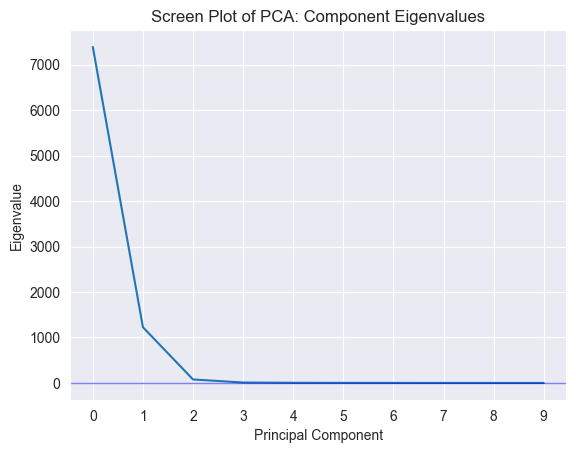

In [6]:
# check the Screen plot
ax = plt.figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, linewidth=1, color='b', alpha=0.5)
plt.title('Screen Plot of PCA: Component Eigenvalues')
plt.show()

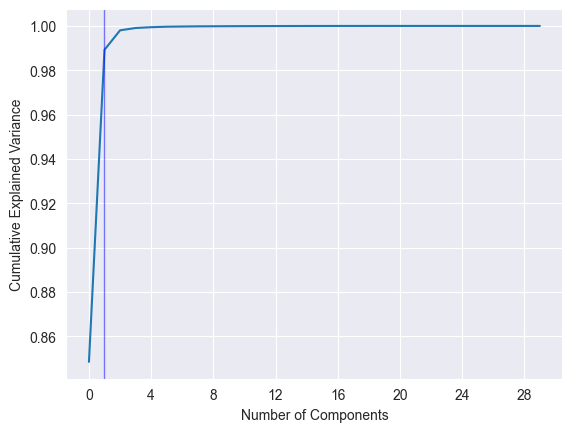

In [7]:
# check the variance explained from PCA
ax = plt.figure().gca()
pca = PCA().fit(df_std)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=1, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [8]:
# check the loading for PCA elements
loadings = pca.components_
results = pd.DataFrame(loadings)
results.index=df.columns
print(results[0].sort_values(ascending=True))

no_of_previous_cancellations           -7.234984e-01
no_of_previous_bookings_not_canceled   -4.136261e-01
repeated_guest                         -2.967112e-01
arrival_date                           -1.111201e-01
no_of_special_requests                 -6.682889e-02
type_of_meal_plan_Meal Plan 1          -3.804962e-02
required_car_parking_space             -2.667547e-02
room_type_reserved_Room_Type 1         -2.133113e-02
room_type_reserved_Room_Type 6         -1.074232e-02
type_of_meal_plan_Not Selected         -1.067258e-02
room_type_reserved_Room_Type 3         -7.584528e-03
room_type_reserved_Room_Type 4         -5.827898e-03
room_type_reserved_Room_Type 5         -1.620709e-03
market_segment_type_Complementary      -7.072097e-05
market_segment_type_Corporate          -9.594860e-15
market_segment_type_Online             -0.000000e+00
market_segment_type_Offline            -0.000000e+00
market_segment_type_Aviation            2.297664e-04
no_of_adults                            5.6418

In [9]:
# run PCA with 1 component
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(df_std)
x_pca = pca.transform(df_std)



In [10]:
# output the csv file
x_pca_df = pd.DataFrame(x_pca)
x_pca_df.to_csv("PCA_dat.csv")